# **Advertising**

# 1. Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load dataset
df = pd.read_csv(r"C:\Users\comp\Downloads\advertising.csv")
print(df.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [5]:
# Dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Statistical summary
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


# 2. EDA

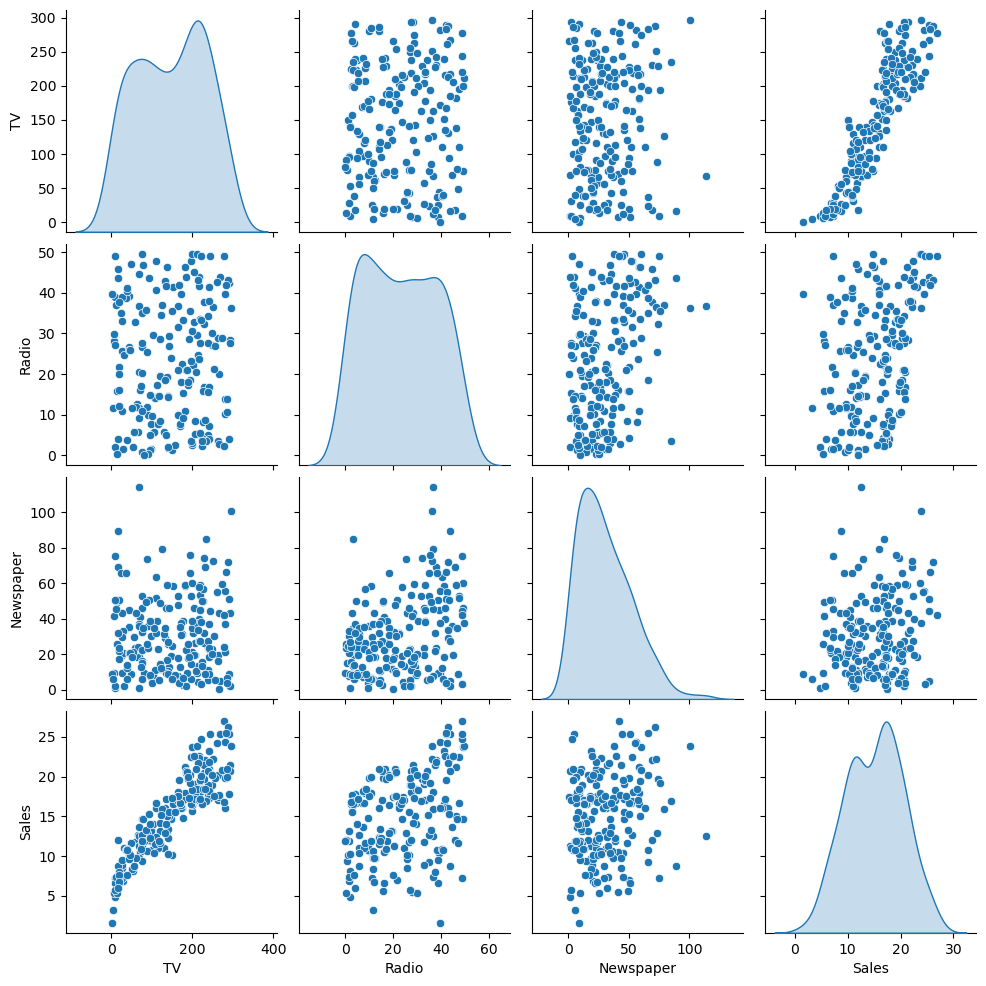

In [7]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind='kde')
plt.show()


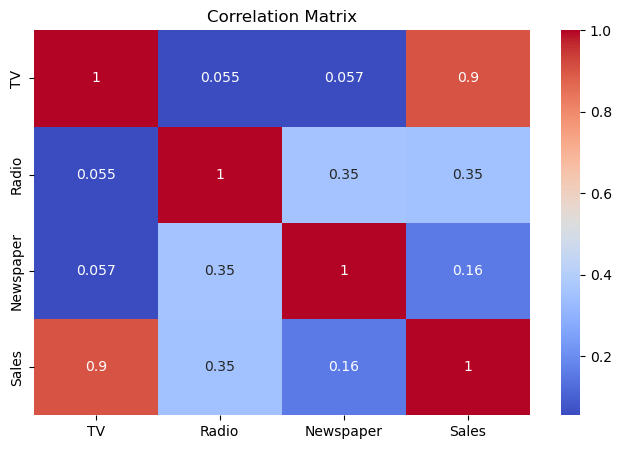

In [8]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 3. Feature Selection and Splitting 

In [9]:
# Independent variables (features) and dependent variable (target)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Model Training 

In [ ]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

#  The coefficients show how much sales increase per unit increase in each channel's spend.

Intercept: 4.714126402214134
Coefficients: [0.05450927 0.10094536 0.00433665]


# 5. Predictions and Model Evaluation

In [11]:
# Predictions on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 2.907756910271091
Root Mean Squared Error (RMSE): 1.7052146229349228
R² Score: 0.9059011844150826


# 6. Visualization of Actual vs Predicted

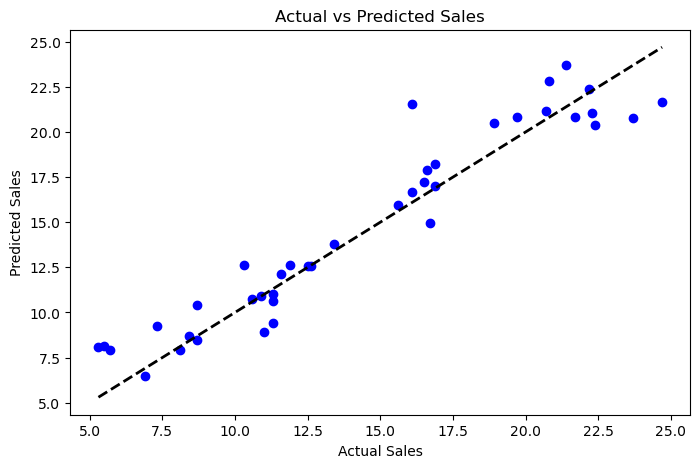

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


# 7. Predicting New Sales Values

In [ ]:
# Predict sales for new advertisement spending
# Sales=4.7141+0.0545×TV+0.1009×Radio+0.0043×Newspaper
# This tells us how Sales is related to TV,Radio Newspaper ad spendings
new_data = pd.DataFrame({
    'TV': [150], # $150,000
    'Radio': [25],# $25,000
    'Newspaper': [20] # $20,000
})

predicted_sales = model.predict(new_data)
print("Predicted Sales for new input:", predicted_sales[0])


Predicted Sales for new input: 15.500884024061671


# **8. Conclusion and Summary**

- TV and Radio are the most effective channels.
- Newspaper has a weak correlation with Sales, indicating it may not be a strong predictor.
- A baseline sales of 4.71 units is expected even with no advertising.
- Every additional $1,000 spent on TV ads increases sales by ~0.0545 units.
- Every additional $1,000 spent on Radio ads increases sales by ~0.1009 units, which is more than TV.
- Every additional $1,000 spent on Newspaper ads increases sales by only ~0.0043 units, which is negligible.